# FIFA practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fifa=pd.read_csv(r'C:\Users\10547\Desktop\WorldCups.csv')
sns.set_theme(style='darkgrid')

In [3]:
fifa.tail(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [4]:
fifa.shape

(20, 10)

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [6]:
fifa.size

200

In [7]:
fifa.isnull().values.any()

False

In [8]:
fifa.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


c:\users\10547\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


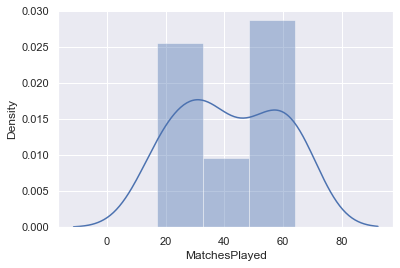

In [9]:
sns.distplot(fifa['MatchesPlayed'])
plt.show()

In [10]:
fifa['Winner'].value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
France        1
England       1
Spain         1
Germany       1
Name: Winner, dtype: int64

In [11]:
m1 = fifa['QualifiedTeams'].mean()
m2 = fifa['QualifiedTeams'].median()
m3 = fifa['QualifiedTeams'].mode()[0]

print(m1,m2,m3)

21.25 16.0 16


In [12]:
fifa[fifa['QualifiedTeams']>m1]['Country']

11           Spain
12          Mexico
13           Italy
14             USA
15          France
16     Korea/Japan
17         Germany
18    South Africa
19          Brazil
Name: Country, dtype: object

In [13]:
fifa[fifa['QualifiedTeams']<m1]['Country']

0         Uruguay
1           Italy
2          France
3          Brazil
4     Switzerland
5          Sweden
6           Chile
7         England
8          Mexico
9         Germany
10      Argentina
Name: Country, dtype: object

In [14]:
GS_median = np.median(fifa['GoalsScored'])
QT_median = np.median(fifa['MatchesPlayed'])
print(GS_median)
print(QT_median)

120.5
38.0


In [15]:
fifa[fifa['GoalsScored']==fifa['GoalsScored'].min()]['Country']

0    Uruguay
1      Italy
Name: Country, dtype: object

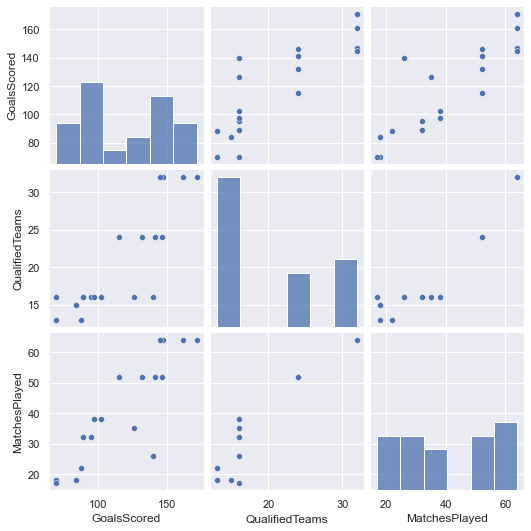

In [16]:
sns.pairplot(fifa[['GoalsScored','QualifiedTeams','MatchesPlayed']])
plt.show()

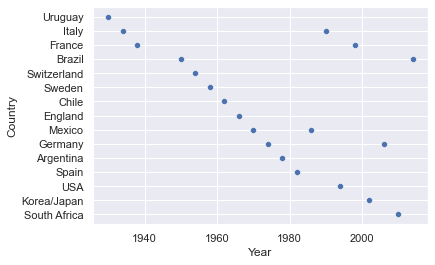

In [18]:
sns.scatterplot(x = fifa['Year'],y=fifa['Country'])
plt.show()

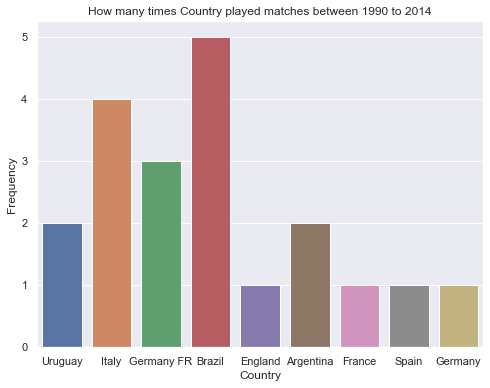

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x=fifa['Winner'])
plt.title('How many times Country played matches between 1990 to 2014')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

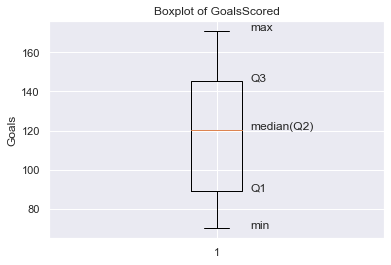

In [21]:
plt.boxplot(fifa['GoalsScored'])

plt.text(x=1.1,y=fifa['GoalsScored'].min(),s='min')
plt.text(x=1.1,y=fifa.GoalsScored.quantile(0.25),s='Q1')
plt.text(x=1.1,y=fifa['GoalsScored'].median(),s='median(Q2)')
plt.text(x=1.1,y=fifa.GoalsScored.quantile(0.75),s='Q3')
plt.text(x=1.1,y=fifa['GoalsScored'].max(),s='max')

plt.title('Boxplot of GoalsScored')
plt.ylabel('Goals')
plt.show()

In [23]:
Q1=fifa.quantile(0.25)
Q3=fifa.quantile(0.75)
IQR=Q3-Q1
IQR

Year              38.00
GoalsScored       56.25
QualifiedTeams    10.00
MatchesPlayed     24.50
dtype: float64

In [24]:
corr_matrix = fifa.corr()
corr_matrix

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
Year,1.000000,0.829886,0.895565,0.972473
GoalsScored,0.829886,1.000000,0.866201,0.876201
QualifiedTeams,0.895565,0.866201,1.000000,0.949164
MatchesPlayed,0.972473,0.876201,0.949164,1.000000


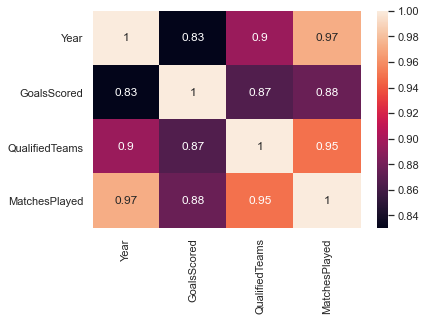

In [25]:
sns.heatmap(corr_matrix,annot = True)
plt.show()